In [1]:
import re

https://docs.python.org/3.6/howto/regex.html#the-backslash-plague

https://www.gnu.org/software/gcal/manual/html_node/Regexp-Operators.html

[Generating tables in markup language](https://www.tablesgenerator.com/markdown_tables)


|   Regular String| Raw string|   	|   	|   	|
|---	|:-:	|:-:	|:-:	|---	|
|"ab*"   	| r"ab*"  	|   	|   	|   	|
|  "\\\\section" 	| r"\\section"  	|   	|   	|   	|
|  "\\w+\\s+\\1" 	| r"\w+\s+\1"  	|   	|   	|   	|



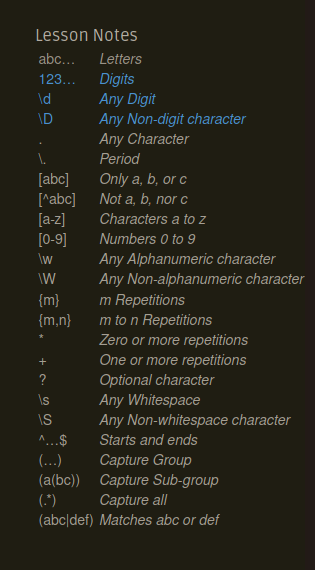

In [ ]:
#^(file.+)\.(pdf)$

## Matching a string

The re package has a number of top level methods, and to test whether a regular expression matches a specific string in Python, you can use re.search(). This method either returns None if the pattern doesn't match, or a re.MatchObject with additional information about which part of the string the match was found.

Note that this method stops after the first match, so this is best suited for testing a regular expression more than extracting data.

In [14]:
# Lets use a regular expression to match a date string. Ignore
# the output since we are just testing if the regex matches.
regex = r"([a-zA-Z]+) (\d+)"
if re.search(regex, "June 24"):
    # Indeed, the expression "([a-zA-Z]+) (\d+)" matches the date string
    
    # If we want, we can use the MatchObject's start() and end() methods 
    # to retrieve where the pattern matches in the input string, and the 
    # group() method to get all the matches and captured groups.
    match = re.search(regex, "June 24")
    
    # This will print [0, 7), since it matches at the beginning and end of the 
    # string
    print("Match at index %s, %s" % (match.start(), match.end()))
    
    # The groups contain the matched values.  In particular:
    #    match.group(0) always returns the fully matched string
    #    match.group(1), match.group(2), ... will return the capture
    #            groups in order from left to right in the input string
    #    match.group() is equivalent to match.group(0)
    
    # So this will print "June 24"
    print("Full match: %s" % (match.group(0)))
    # So this will print "June"
    print("Month: %s" % (match.group(1)))
    # So this will print "24"
    print("Day: %s" % (match.group(2)))
else:
    # If re.search() does not match, then None is returned
    print("The regex pattern does not match. :(")

Match at index 0, 6
Full match: June 2
Month: June
Day: 2


## Capturing groups matchList = re.findall(pattern, input_str, flags=0)
matchList = re.finditer(pattern, input_str, flags=0)


Unlike the re.search() method above, we can use re.findall() to perform a global search over the whole input string. If there are capture groups in the pattern, then it will return a list of all the captured data, but otherwise, it will just return a list of the matches themselves, or an empty list if no matches are found.

If you need additional context for each match, you can use re.finditer() which instead returns an iterator of re.MatchObjects to walk through. Both methods take the same parameters.

In [35]:
pattern= r'[ab]a'
input_str = 'aax'
matchList = re.findall(pattern, input_str, flags=0)
matchList = re.finditer(pattern, input_str, flags=0)

In [12]:
# Lets use a regular expression to match a few date strings.
regex = r"[a-zA-Z]+ \d+"
matches = re.findall(regex, "June 24, August 9, Dec 12")
for match in matches:
    # This will print:
    #   June 24
    #   August 9
    #   Dec 12
    print("Full match: %s" % (match))

# To capture the specific months of each date we can use the following pattern
regex = r"([a-zA-Z]+) \d+"
matches = re.findall(regex, "June 24, August 9, Dec 12")
for match in matches:
    # This will now print:
    #   June
    #   August
    #   Dec
    print("Match month: %s" % (match))

# If we need the exact positions of each match
regex = r"([a-zA-Z]+) \d+"
matches = re.finditer(regex, "June 24, August 9, Dec 12")
for match in matches:
    # This will now print:
    #   0 7
    #   9 17
    #   19 25
    # which corresponds with the start and end of each match in the input string
    print("Match at index: %s, %s" % (match.start(), match.end()))

Full match: June 24
Full match: August 9
Full match: Dec 12
Match month: June
Match month: August
Match month: Dec
Match at index: 0, 7
Match at index: 9, 17
Match at index: 19, 25


## Finding and replacing strings

Another common task is to find and replace a part of a string using regular expressions, for example, to replace all instances of an old email domain, or to swap the order of some text. You can do this in Python with the re.sub() method.

In [ ]:
replacedString = re.sub(pattern, replacement_pattern, input_str, count, flags=0)

In [36]:
# Lets try and reverse the order of the day and month in a date 
# string. Notice how the replacement string also contains metacharacters
# (the back references to the captured groups) so we use a raw 
# string for that as well.
regex = r"([a-zA-Z]+) (\d+)"

# This will reorder the string and print:
#   24 of June, 9 of August, 12 of Dec
print(re.sub(regex, r"\2 of \1", "June 24, August 9, Dec 12"))

24 of June, 9 of August, 12 of Dec



   * re.IGNORECASE makes the pattern case insensitive so that it matches strings of different capitalizations
   * re.MULTILINE is necessary if your input string has newline characters (\n), this flag allows the start and end metacharacter (^ and $ respectively) to match at the beginning and end of each line instead of at the beginning and end of the whole input string
   * re.DOTALL allows the dot (.) metacharacter match all characters, including the newline character (\n)


## compiling a pattern for performance

In Python, creating a new regular expression pattern to match many strings can be slow, so it is recommended that you compile them if you need to be testing or extracting information from many input strings using the same expression. This method returns a re.RegexObject.

In [ ]:
# Lets create a pattern and extract some information with it
regex = re.compile(r"(\w+) World")
result = regex.search("Hello World is the easiest")
if result:
    # This will print:
    #   0 11
    # for the start and end of the match
    print(result.start(), result.end())

# This will print:
#   Hello
#   Bonjour
# for each of the captured groups that matched
for result in regex.findall("Hello World, Bonjour World"):
    print(result)

# This will substitute "World" with "Earth" and print:
#   Hello Earth
print(regex.sub(r"\1 Earth", "Hello World"))